In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

grid_sizes = [20, 100, 1000]

# DATA

In [2]:
# average time of 10 timesteps iterated for 50 timesteps
dmap = {
    '20': [0.7294416427612305, 0.6023883819580078, 0.5514621734619141, 0.5277693271636963, 0.5135822296142578, 0.504767894744873, 0.49912588936941965, 0.49456655979156494, 0.4906972249348958, 0.48766374588012695],
    '100': [0.8574485778808594, 0.7247805595397949, 0.6649971008300781, 0.6321966648101807, 0.611419677734375, 0.6058653195699056, 0.5954980850219727, 0.5889862775802612, 0.5853123135036893, 0.581059455871582],
    '1000': [1.657724380493164, 1.4924049377441406, 1.424574851989746, 1.3604342937469482, 1.3272380828857422, 1.317318280537923, 1.3074261801583427, 1.302415132522583, 1.3096385531955295, 1.3077354431152344]
}

raycasting = {
    '20': [0.18150806427001953, 0.17426013946533203, 0.17122427622477213, 0.17000436782836914, 0.1688241958618164, 0.1681367556254069, 0.1678807394845145, 0.16767680644989014, 0.1672506332397461, 0.1667499542236328],
    '100':  [0.5996227264404297, 0.5983591079711914, 0.5986452102661133, 0.598365068435669, 0.5991601943969727, 0.6003499031066895, 0.6003447941371373, 0.6000787019729614, 0.6002664566040039, 0.5999326705932617],
    '1000': [5.884194374084473, 5.829215049743652, 5.811516443888347, 5.7945191860198975, 5.783700942993164, 5.780378977457683, 5.816905839102609, 5.837124586105347, 5.862731403774685, 5.892329216003418]   
}

# memory data
memory_usage = {
    '20': {'dmap': 17696, 'raycasting': 3200},
    '100': {'dmap': 10528, 'raycasting': 80000},
    '1000': {'dmap': 800, 'raycasting': 8000000}
}

# accuracy data
accuracy = {
    '20': 45.5,
    '100': 49.25,
    '1000': 93.25
}

# VISUALS

### 1. Performance Comparison

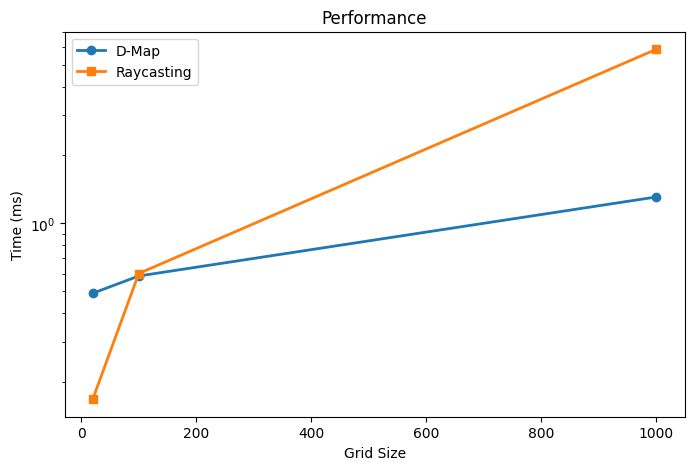

In [3]:
plt.figure(figsize=(8, 5))

dmap_avg = [np.mean(dmap[str(size)][-3:]) for size in grid_sizes]
ray_avg = [np.mean(raycasting[str(size)][-3:]) for size in grid_sizes]

plt.plot(grid_sizes, dmap_avg, 'o-', label='D-Map', linewidth=2)
plt.plot(grid_sizes, ray_avg, 's-', label='Raycasting', linewidth=2)
plt.xlabel('Grid Size')
plt.ylabel('Time (ms)')
plt.title('Performance')
plt.legend()
plt.yscale('log')
plt.show()

### 2. Memory Usage

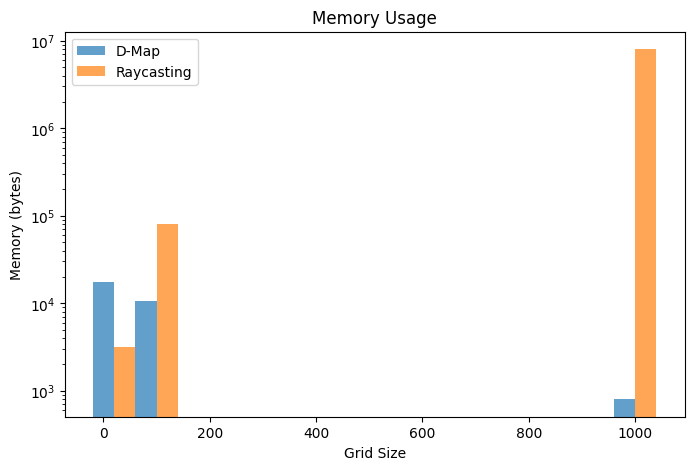

In [4]:
plt.figure(figsize=(8, 5))

dmap_mem = [memory_usage[str(size)]['dmap'] for size in grid_sizes]
ray_mem = [memory_usage[str(size)]['raycasting'] for size in grid_sizes]

plt.bar(np.array(grid_sizes) - 20, dmap_mem, width=40, label='D-Map', alpha=0.7)
plt.bar(np.array(grid_sizes) + 20, ray_mem, width=40, label='Raycasting', alpha=0.7)
plt.xlabel('Grid Size')
plt.ylabel('Memory (bytes)')
plt.title('Memory Usage')
plt.legend()
plt.yscale('log')
plt.show()

#### 3. Accuracy

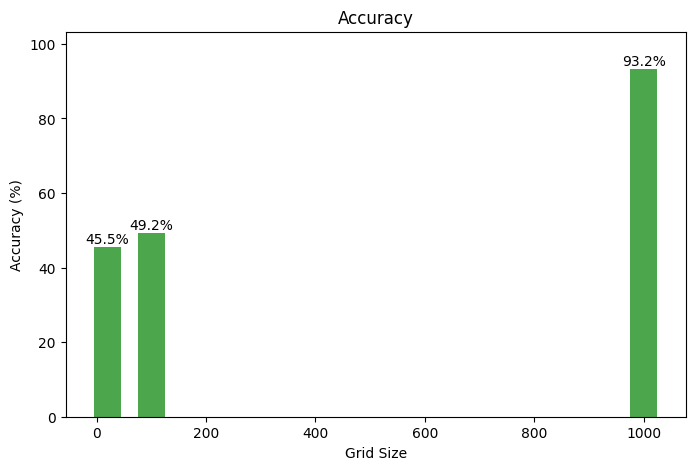

In [5]:
plt.figure(figsize=(8, 5))
acc_values = [accuracy[str(size)] for size in grid_sizes]
plt.bar(grid_sizes, acc_values, color='green', alpha=0.7, width=50)  # Added width
plt.xlabel('Grid Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.ylim(0, max(acc_values) + 10)
for i, v in enumerate(acc_values):
    plt.text(grid_sizes[i], v + 1, f'{v:.1f}%', ha='center')
plt.show()